# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
#lat={lat}&lon={lon}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units=metric"
    response = requests.get(city_url).json()
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat'] 
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind =  response['wind']['speed']
        city_country =  response['sys']['country']
        city_date =  response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | holualoa
Processing Record 7 of Set 1 | mahina
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | lerma
Processing Record 10 of Set 1 | yunyang
Processing Record 11 of Set 1 | bermejillo
Processing Record 12 of Set 1 | talavera
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | lakatoro
Processing Record 16 of Set 1 | xichang
Processing Record 17 of Set 1 | horta
Processing Record 18 of Set 1 | cairns city
City not found. Skipping...
Processing Record 19 of Set 1 | myskhako
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 

Processing Record 40 of Set 4 | natchitoches
Processing Record 41 of Set 4 | paka
Processing Record 42 of Set 4 | neem ka thana
Processing Record 43 of Set 4 | olonkinbyen
Processing Record 44 of Set 4 | udaipur
Processing Record 45 of Set 4 | agat village
Processing Record 46 of Set 4 | santo domingo de los colorados
Processing Record 47 of Set 4 | esmeralda
Processing Record 48 of Set 4 | isafjordur
Processing Record 49 of Set 4 | north bend
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | kapuskasing
Processing Record 2 of Set 5 | slawharad
Processing Record 3 of Set 5 | hayma'
City not found. Skipping...
Processing Record 4 of Set 5 | tottori
Processing Record 5 of Set 5 | greymouth
Processing Record 6 of Set 5 | wanxian
Processing Record 7 of Set 5 | toamasina
Processing Record 8 of Set 5 | san jose
Processing Record 9 of Set 5 | fredericton
Processing Record 10 of Set 5 | ebon
Processing Record 11 of Set 5 | igarka
Processing Record 12 of Set 5 | natal
Proce

Processing Record 30 of Set 8 | acapulco de juarez
Processing Record 31 of Set 8 | kourou
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | rongelap
Processing Record 34 of Set 8 | maues
Processing Record 35 of Set 8 | east london
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | konarka
Processing Record 38 of Set 8 | south venice
Processing Record 39 of Set 8 | hancheng
Processing Record 40 of Set 8 | goure
Processing Record 41 of Set 8 | strezhevoy
Processing Record 42 of Set 8 | tongren
Processing Record 43 of Set 8 | usinsk
Processing Record 44 of Set 8 | pierre
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | dire
Processing Record 47 of Set 8 | copala
Processing Record 48 of Set 8 | mikuni
Processing Record 49 of Set 8 | gallatin
Processing Record 0 of Set 9 | tindouf
Processing Record 1 of Set 9 | tromso
Processing Record 2 of Set 9 | sur
Processing Record 3 of Set 9 | punakha
Processing Record 4 of S

Processing Record 20 of Set 12 | khanty-mansiysk
Processing Record 21 of Set 12 | pervomayskoye
Processing Record 22 of Set 12 | yola
Processing Record 23 of Set 12 | djamaa
Processing Record 24 of Set 12 | terrace
Processing Record 25 of Set 12 | afif
Processing Record 26 of Set 12 | howard springs
Processing Record 27 of Set 12 | saurimo
Processing Record 28 of Set 12 | uliastay
Processing Record 29 of Set 12 | mandamarri
Processing Record 30 of Set 12 | maubara
City not found. Skipping...
Processing Record 31 of Set 12 | hun
Processing Record 32 of Set 12 | flin flon
Processing Record 33 of Set 12 | hauterive
Processing Record 34 of Set 12 | loango
Processing Record 35 of Set 12 | bargaal
Processing Record 36 of Set 12 | okha
Processing Record 37 of Set 12 | gizo
Processing Record 38 of Set 12 | idaho falls
Processing Record 39 of Set 12 | guichon
Processing Record 40 of Set 12 | issia
Processing Record 41 of Set 12 | smila
Processing Record 42 of Set 12 | boras
Processing Record 43

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.68,71,64,2.24,NZ,1697432423
1,adamstown,-25.0660,-130.1015,21.76,82,72,2.03,PN,1697432424
2,albany,42.6001,-73.9662,8.71,85,100,3.81,US,1697432196
3,grytviken,-54.2811,-36.5092,0.43,96,100,4.07,GS,1697432424
4,holualoa,19.6228,-155.9522,23.21,93,68,0.45,US,1697432425


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("./../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("./../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,71,64,2.24,NZ,1697432423
1,adamstown,-25.0660,-130.1015,21.76,82,72,2.03,PN,1697432424
2,albany,42.6001,-73.9662,8.71,85,100,3.81,US,1697432196
3,grytviken,-54.2811,-36.5092,0.43,96,100,4.07,GS,1697432424
4,holualoa,19.6228,-155.9522,23.21,93,68,0.45,US,1697432425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

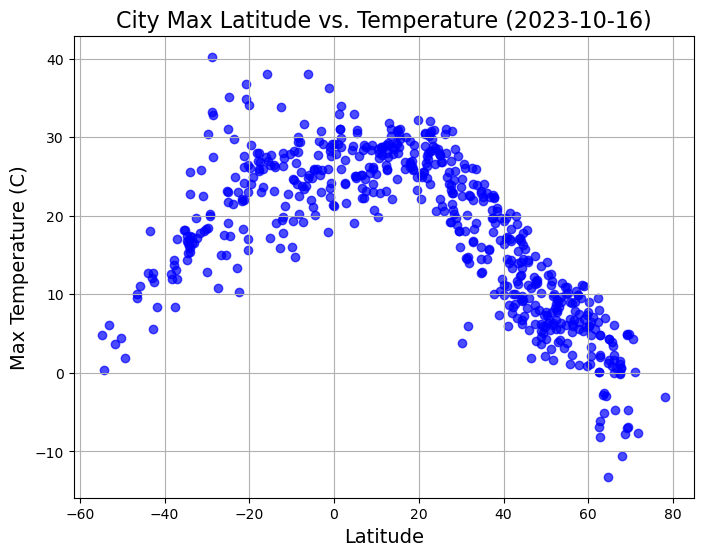

In [36]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b', alpha=0.7) 

# Incorporate the other graph properties
today = date.today().strftime("%Y-%m-%d") 
plt.title(f'City Max Latitude vs. Temperature ({today})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("./../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

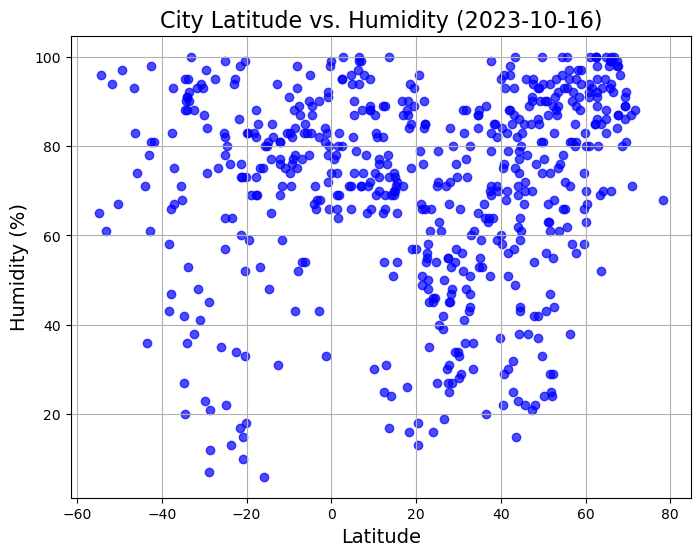

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b', alpha=0.7) 

# Incorporate the other graph properties
today = date.today().strftime("%Y-%m-%d") 
plt.title(f'City Latitude vs. Humidity ({today})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("./../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

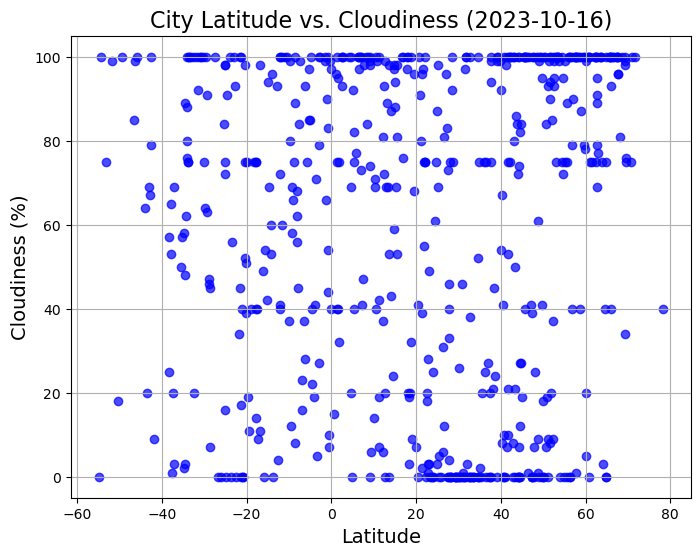

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b', alpha=0.7) 


# Incorporate the other graph properties
today = date.today().strftime("%Y-%m-%d") 
plt.title(f'City Latitude vs. Cloudiness ({today})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("./../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

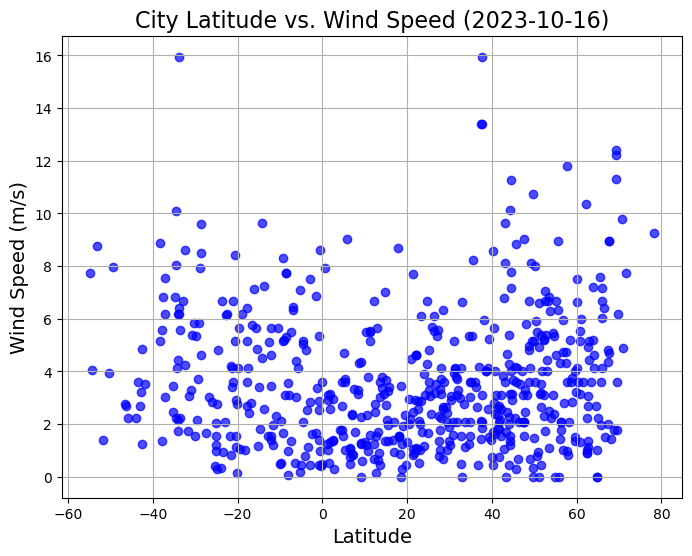

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b', alpha=0.7) 

# Incorporate the other graph properties
today = date.today().strftime("%Y-%m-%d") 
plt.title(f'City Latitude vs. Wind Speed ({today})', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid(True)


# Save the figure
plt.savefig("./../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title='', x_label='', y_label='',x_anno=0,y_anno=0):
    # Calculate linear regression line
    regression_coef = np.polyfit(x, y, 1)
    regression_line = np.polyval(regression_coef, x)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    r, _ = stats.pearsonr(x, y)
    print(f"The r-value is: {r}")
   
    # Create scatter plot and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='b', alpha=0.7)
    plt.plot(x, regression_line, color='r')
    plt.annotate(line_eq,(x_anno,y_anno),fontsize=15,color="red")
    
    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Show plot
    plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,8.71,85,100,3.81,US,1697432196
4,holualoa,19.6228,-155.9522,23.21,93,68,0.45,US,1697432425
6,naze,28.3667,129.4833,24.51,53,0,6.34,JP,1697432426
7,lerma,42.0261,-3.7598,13.31,88,100,2.14,ES,1697432427
8,yunyang,33.4474,112.7142,25.93,36,0,2.78,CN,1697432429


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.68,71,64,2.24,NZ,1697432423
1,adamstown,-25.0660,-130.1015,21.76,82,72,2.03,PN,1697432424
3,grytviken,-54.2811,-36.5092,0.43,96,100,4.07,GS,1697432424
5,mahina,-17.5065,-149.4890,26.87,69,40,4.12,PF,1697432425
11,sao joao da barra,-21.6403,-41.0511,22.07,98,100,0.81,BR,1697432431


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8989028806422141


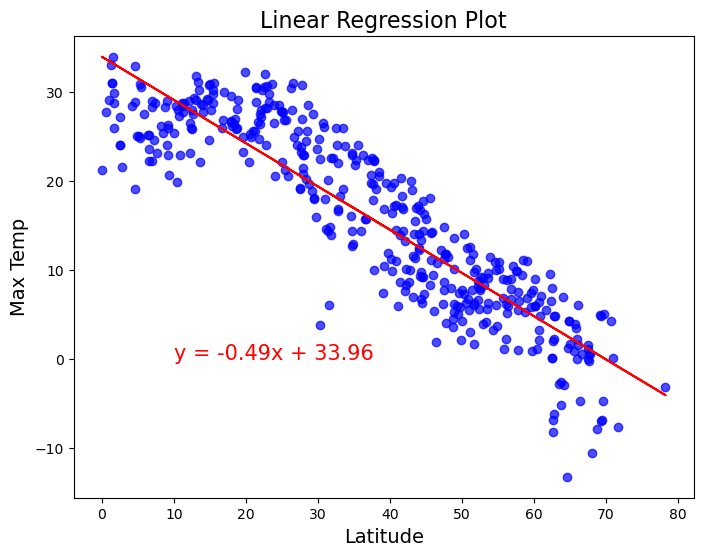

In [80]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Linear Regression Plot', 'Latitude', 'Max Temp',10,0)

The r-value is: 0.6598563757098218


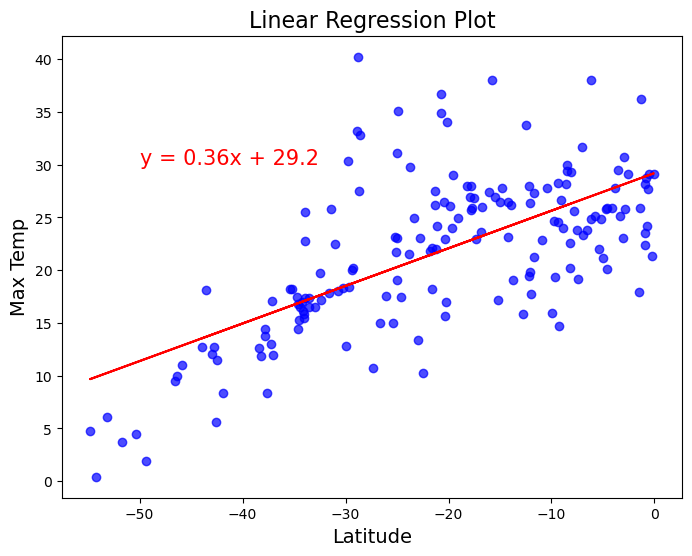

In [81]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Linear Regression Plot', 'Latitude', 'Max Temp',-50,30)

**Discussion about the linear relationship: **
Northern Hemisphere:- it is evident from the above plot that temperature is inversly proportional to latitude. as the latitude increases, the temperature decreases in a liner manner.

Southern hemisphere:- in southern hemispehere when the latitude increases, the temperarture also increases linerly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18768909829112373


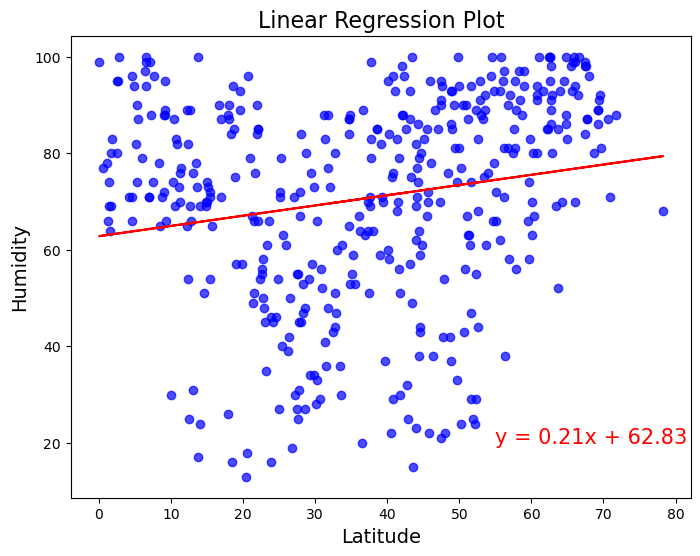

In [85]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Linear Regression Plot', 'Latitude', 'Humidity',55,20)

The r-value is: 0.07776184982759231


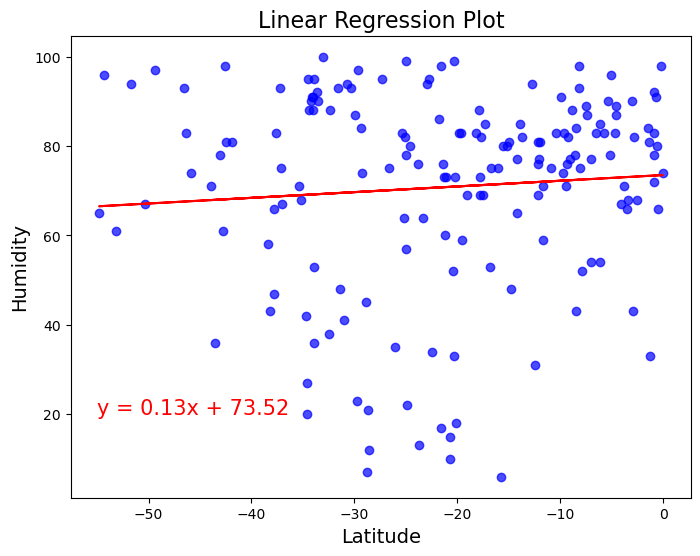

In [88]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Linear Regression Plot', 'Latitude', 'Humidity',-55,20)

**Discussion about the linear relationship:** there is no direct or linear relationship observed in humidity and latitude. humidity is comperatively dense in northern hemisphere then in southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13209626737703883


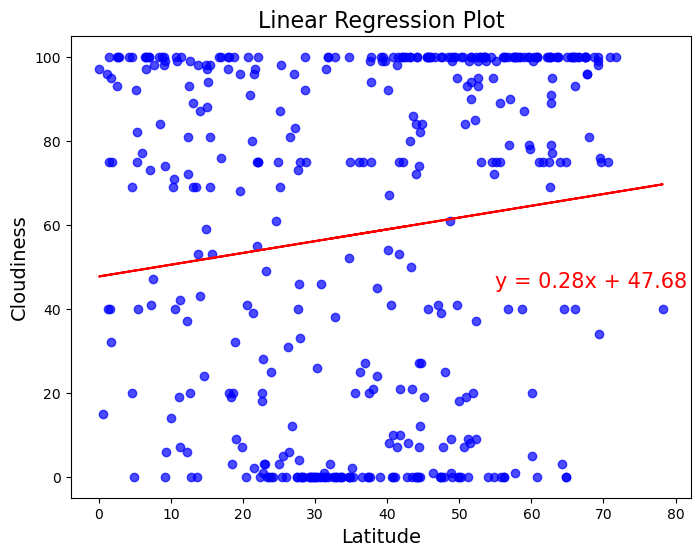

In [90]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Linear Regression Plot', 'Latitude', 'Cloudiness',55,45)

The r-value is: -0.018064130543041804


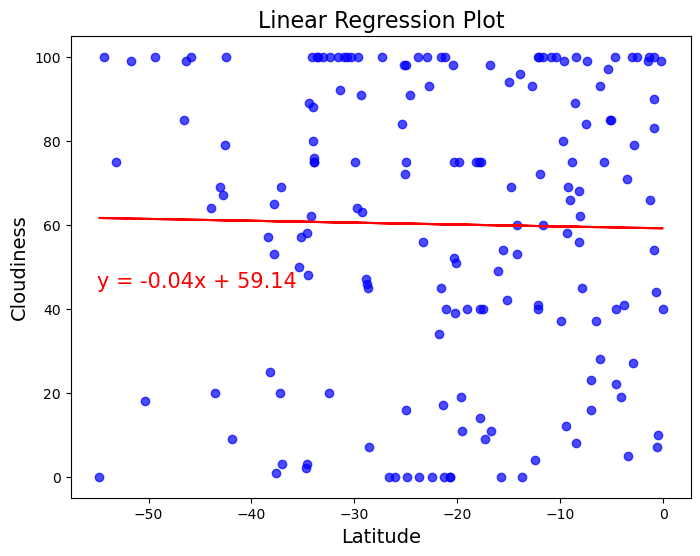

In [92]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Linear Regression Plot', 'Latitude', 'Cloudiness',-55,45)

**Discussion about the linear relationship:** there's very less corelation between latitude and cloudiness that's evident by low r values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2854810305976069


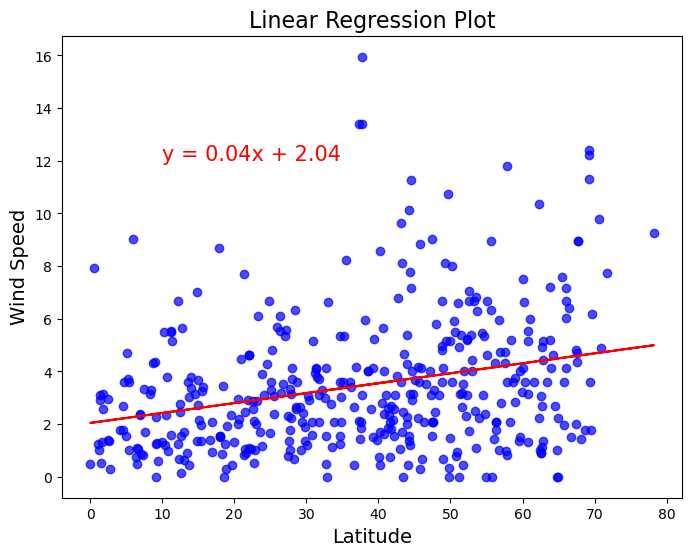

In [95]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Linear Regression Plot', 'Latitude', 'Wind Speed',10,12)

The r-value is: -0.19700019951427603


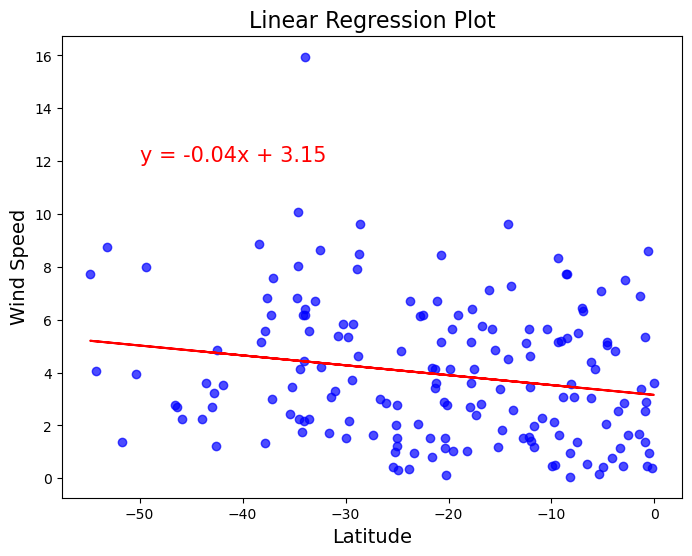

In [97]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Linear Regression Plot', 'Latitude', 'Wind Speed',-50,12)

**Discussion about the linear relationship:** it is seen in above plots that wind speed and latitude are directly proportional in northern hemisphere and inversly proportional in southern hemisphere.